<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [ ]:
# default_exp utils.plot

In [ ]:
# export
import numpy as np
import matplotlib

matplotlib.use("Agg")
import matplotlib.pyplot as plt

from uberduck_ml_dev.text.symbols import id_to_symbol, DEFAULT_SYMBOLS


def save_figure_to_numpy(fig):
    """Save figure to a numpy array."""
    data = np.fromstring(fig.canvas.tostring_rgb(), dtype=np.uint8, sep="")
    data = data.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    plt.close(fig)
    return data


def plot_tensor(tensor):
    plt.style.use("default")
    fig, ax = plt.subplots(figsize=(12, 3))
    im = ax.imshow(tensor, aspect="auto", origin="lower", interpolation="none")
    plt.colorbar(im, ax=ax)
    plt.tight_layout()
    fig.canvas.draw()
    data = save_figure_to_numpy(fig)
    plt.close()
    return data


def plot_spectrogram(mel):
    figure = plt.figure()
    plt.xlabel("Spectrogram frame")
    plt.ylabel("Channel")
    plt.imshow(mel, aspect="auto", origin="lower", interpolation="none", cmap="inferno")
    figure.canvas.draw()
    return figure

/Users/zwf/miniconda3/envs/uberduck/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/Users/zwf/miniconda3/envs/uberduck/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/zwf/miniconda3/envs/uberduck/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/zwf/miniconda3/envs/uberduck/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/zwf/miniconda3/envs/uberduck/lib/python3.6/site-packages/traitlets/config/application.py", line 664, in launch_instance
    app.start()
  File "/Users/zwf/miniconda3/envs/uber

In [ ]:
%matplotlib inline

In [ ]:
import torch

mel = torch.load("test/fixtures/stevejobs-1.pt")
figure = plot_spectrogram(mel)
numpy_figure = save_figure_to_numpy(figure)

plt.show()
# numpy_figure

/Users/zwf/miniconda3/envs/uberduck/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
# export


def plot_attention(attention, encoder_length=None, decoder_length=None):
    figure = plt.figure()
    plt.xlabel("Decoder timestep")
    plt.ylabel("Encoder timestep")
    plt.imshow(
        attention.data.cpu().numpy(),
        aspect="auto",
        origin="lower",
        interpolation="none",
        cmap="inferno",
    )
    title_info = []
    if encoder_length is not None:
        title_info.append(f"Encoder_length: {encoder_length}")
    if decoder_length is not None:
        title_info.append(f"Decoder length: {decoder_length}")
    title = " ".join(title_info)
    plt.title(title)
    figure.canvas.draw()
    return figure


def plot_attention_phonemes(seq, attention, symbol_set=DEFAULT_SYMBOLS):
    figure = plt.figure(figsize=(15, 8))
    phonemes = []

    for token in seq.numpy():
        if token == len(id_to_symbol[symbol_set]):
            phonemes.append("~")
        else:
            phonemes.append(id_to_symbol[symbol_set][token][1:])

    xtick_locs = np.pad(
        np.cumsum(np.sum(attention.data.cpu().numpy(), axis=1)), (1, 0)
    ).astype(np.int16)[:-1]
    ytick_locs = np.arange(seq.shape[-1])
    plt.yticks(ytick_locs, phonemes)
    plt.xticks(xtick_locs, xtick_locs)

    plt.imshow(
        attention.data.cpu().numpy(),
        aspect="auto",
        origin="lower",
        interpolation="none",
        cmap="Greys",
    )

    i = 0
    for phon, y in zip(phonemes, ytick_locs):
        if phon == "~":
            continue
        if i == 4:
            plt.axhline(y=y, color="k")
        if i == 3:
            plt.axhline(y=y, color="r")
        if i == 2:
            plt.axhline(y=y, color="g")
        if i == 1:
            plt.axhline(y=y, color="b")
        if i == 0:
            plt.axhline(y=y, color="m")
        i += 1
        i = i % 5

    plt.grid(axis="x")
    plt.title("Phoneme Alignment")
    plt.xlabel("Time (mel frames)")
    plt.ylabel("Phonemes")

    return figure


def plot_gate_outputs(gate_targets=None, gate_outputs=None):
    figure = plt.figure()
    plt.xlabel("Frames")
    plt.ylabel("Gate state")
    ax = figure.add_axes([0, 0, 1, 1])
    if gate_targets is not None:
        ax.scatter(
            range(gate_targets.size(0)),
            gate_targets,
            alpha=0.5,
            color="green",
            marker="+",
            s=1,
            label="target",
        )
    if gate_outputs is not None:
        ax.scatter(
            range(gate_outputs.size(0)),
            gate_outputs,
            alpha=0.5,
            color="red",
            marker=".",
            s=1,
            label="predicted",
        )
    figure.canvas.draw()
    return figure

/Users/zwf/miniconda3/envs/uberduck/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  # This is added back by InteractiveShellApp.init_path()


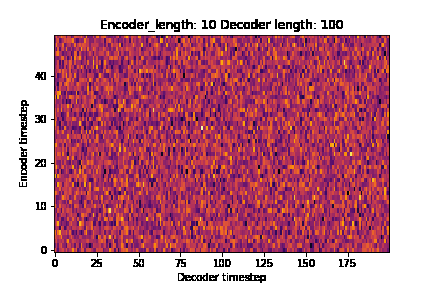

In [ ]:
fig = plot_attention(torch.randn(50, 200), 10, 100)
numpy_figure = save_figure_to_numpy(fig)
from PIL import Image as im

#
im.fromarray(numpy_figure)

In [ ]:
fig = plot_gate_outputs(torch.randn(300), torch.randn(300))
numpy_figure = save_figure_to_numpy(fig)
# im.fromarray(numpy_figure)

/Users/zwf/miniconda3/envs/uberduck/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  # This is added back by InteractiveShellApp.init_path()
